In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('credit_scoring.csv')
data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


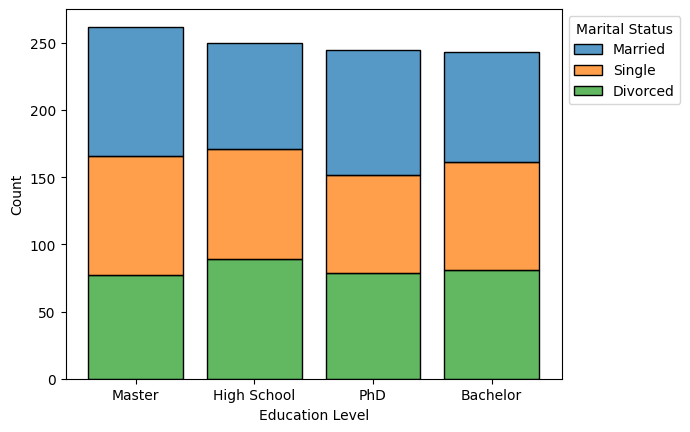

In [4]:
ax = sns.histplot(data, x='Education Level', hue='Marital Status', multiple='stack', shrink=0.8)
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

In [5]:
data['Gender'].value_counts()
data['Marital Status'].value_counts()
data['Education Level'].value_counts()
data['Employment Status'].value_counts()


Employment Status
Self-Employed    347
Employed         328
Unemployed       325
Name: count, dtype: int64

In [6]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Marital Status'] = data['Marital Status'].map({'Single': 0, 'Married':1, 'Divorced': 2})
data['Education Level'] = data['Education Level'].map({'High School': 0, 'Bachelor':1, 'Master':2, 'PhD':3})
data['Employment Status'] = data['Employment Status'].map({'Unemployed':0, 'Employed':1, "Self-Employed":2})
data['Type of Loan'] = data['Type of Loan'].map({'Auto Loan': 0, 'Home Loan':1, 'Personal Loan':2})

In [7]:
data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,1,1,2,1,0.22,2685.0,2,4675000,2.65,48,2
1,25,1,1,0,0,0.20,2371.0,9,3619000,5.19,60,0
2,30,0,0,2,1,0.22,2771.0,6,957000,2.76,12,0
3,58,0,1,3,0,0.12,1371.0,2,4731000,6.57,60,0
4,32,1,1,1,2,0.99,828.0,2,3289000,6.28,36,2


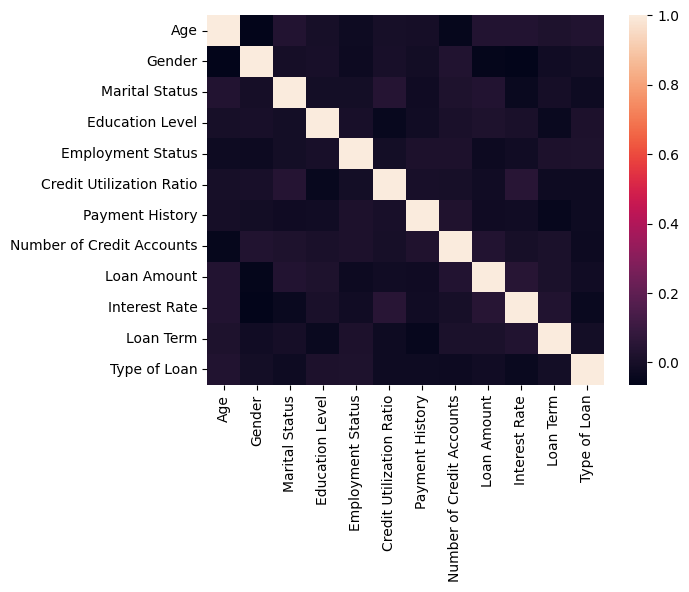

In [8]:
sns.heatmap(data.corr())
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [27]:
data.columns

Index(['Age', 'Gender', 'Marital Status', 'Education Level',
       'Employment Status', 'Credit Utilization Ratio', 'Payment History',
       'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
       'Loan Term', 'Type of Loan'],
      dtype='object')

In [28]:
X = data[['Age', 'Gender', 'Marital Status', 'Education Level',
       'Employment Status', 'Credit Utilization Ratio', 'Payment History',
       'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
       'Loan Term']]
y = data['Type of Loan']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [30]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [31]:
pred = model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))


[[67  0 39]
 [76  0 29]
 [65  0 24]]


              precision    recall  f1-score   support

           0       0.32      0.63      0.43       106
           1       0.00      0.00      0.00       105
           2       0.26      0.27      0.27        89

    accuracy                           0.30       300
   macro avg       0.19      0.30      0.23       300
weighted avg       0.19      0.30      0.23       300



/opt/anaconda3/envs/MLandDataScience/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/MLandDataScience/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/MLandDataScience/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap